In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree

In [38]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv('heart_disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0


### Exploratory Data Analysis

In [6]:
#Checking for missing values
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [8]:
medianop=df['oldpeak'].median()
medianop

0.5

In [9]:
df.fillna({'oldpeak':medianop},inplace=True)

In [10]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [37]:
# Summary Statistics
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000
mean,52.340357,132.102107,243.047002,140.996759,0.730956,0.505673
std,8.857688,17.444279,51.240768,25.114866,0.901315,0.664780
min,30.000000,90.000000,85.000000,67.000000,0.000000,0.000000
25%,46.000000,120.000000,208.000000,122.000000,0.000000,0.000000
50%,53.000000,130.000000,238.000000,143.000000,0.400000,0.000000
75%,58.000000,140.000000,275.000000,160.000000,1.400000,1.000000
max,76.000000,180.000000,409.000000,194.000000,3.600000,2.000000


### Visualizing Distributions and outliers

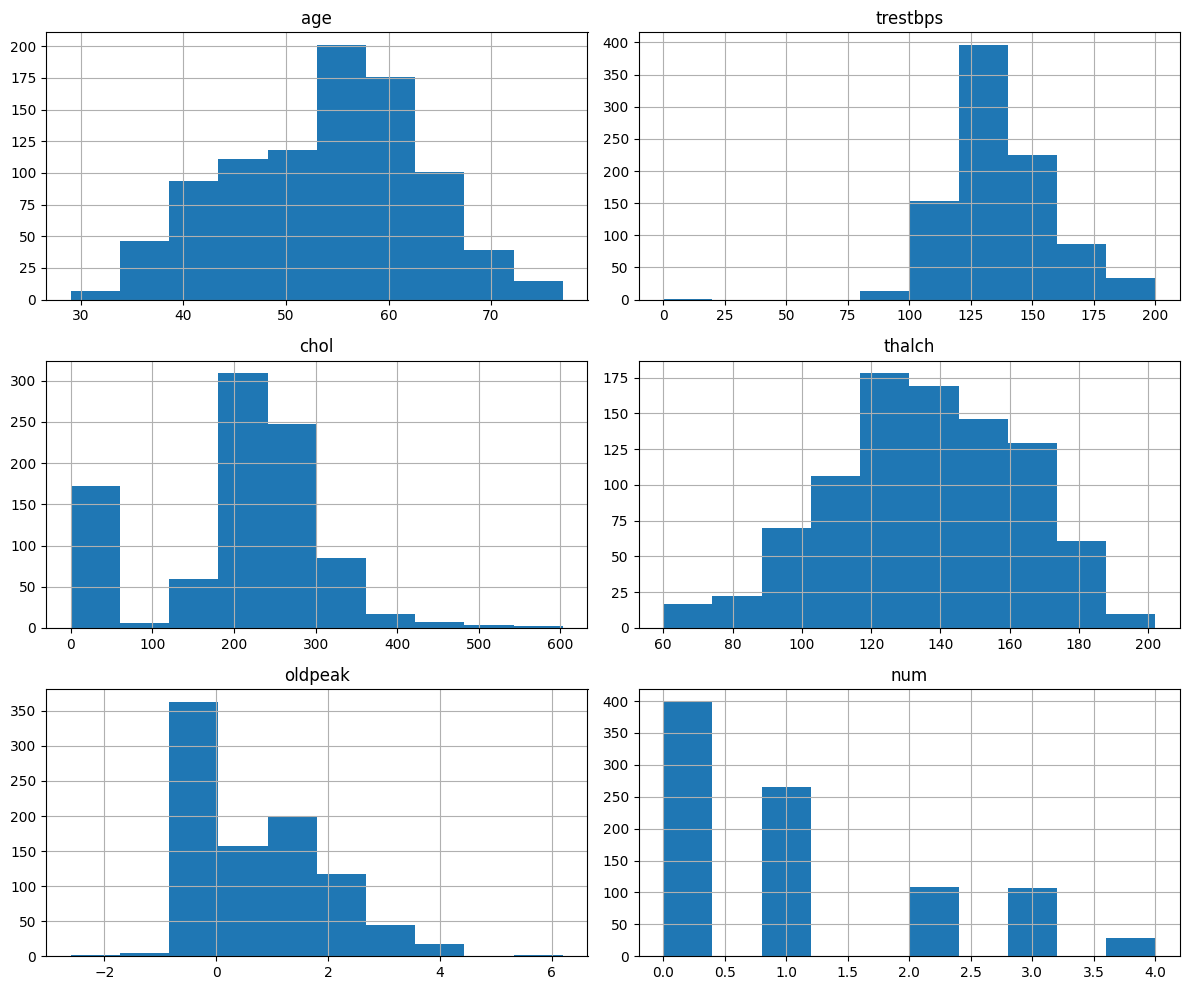

In [13]:
# Histogram for numerical features
df.hist(figsize=(12,10))
plt.tight_layout()
plt.show()

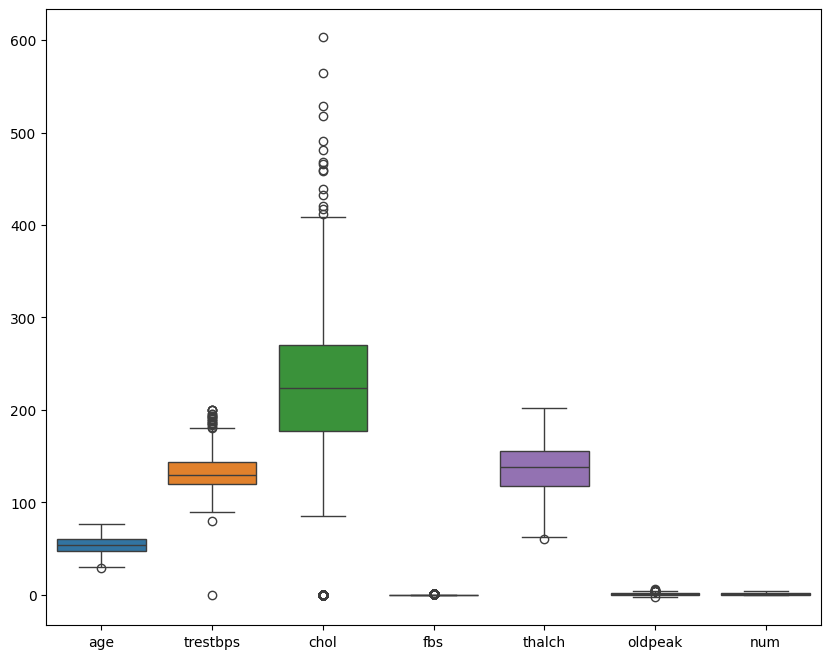

In [14]:
# Boxplot to detect outliers
plt.figure(figsize=(10,8))
sns.boxplot(data=df)
plt.show()

In [15]:
# Define function for detecting outliers using IQR for all the numerical columns
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply outlier removal to all numerical columns
def remove_outliers_all(df):
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        df = remove_outliers(df, column)
    return df

# Apply the function to the entire dataframe
df_cleaned = remove_outliers_all(df)
df=df_cleaned

# Display the cleaned dataframe
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,72,Male,asymptomatic,160,213,True,lv hypertrophy,130,FALSE,1.5,upsloping,reversable defect,2
764,58,Male,non-anginal,150,219,False,st-t abnormality,118,TRUE,0.0,downsloping,normal,2
765,58,Male,non-anginal,150,219,False,st-t abnormality,118,TRUE,0.0,downsloping,fixed defect,2
767,58,Male,non-anginal,158,232,False,st-t abnormality,138,TURE,0.5,downsloping,reversable defect,2


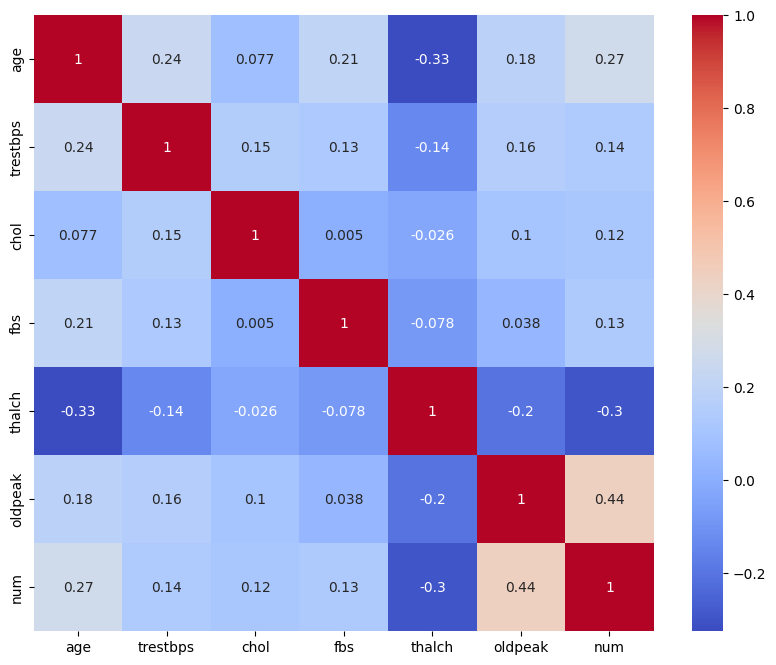

In [39]:
# Correlation marix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

### Feature Engineering

In [17]:
# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

In [40]:
# Scaling numerical Features
scaler = StandardScaler()
numerical_columns = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

In [20]:
df_encoded

,age,trestbps,chol,fbs,thalch,oldpeak,num,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,exang_TRUE,exang_TURE,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,1.204410,0.739977,-0.196233,True,0.358773,1.742252,0,1,0,0,1,0,0,0,0,0,0,0,0
1,-1.281323,0.166258,-0.782180,False,-0.358515,-0.811647,0,1,1,0,0,1,0,0,0,1,0,0,0
2,0.526483,0.453117,-0.997027,False,0.279075,-0.367491,0,1,0,0,0,1,0,0,0,1,0,0,0
3,-0.038456,-0.809065,-1.114216,False,1.952748,-0.811647,0,1,0,0,1,0,0,0,0,1,0,0,0
4,0.526483,-1.268040,-0.821243,False,-0.597611,0.853939,0,1,0,0,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,2.221301,1.600555,-0.586864,True,-0.438214,0.853939,2,1,0,0,0,0,0,0,0,0,1,0,1
764,0.639471,1.026836,-0.469675,False,-0.916406,-0.811647,2,1,0,1,0,0,1,1,0,0,0,1,0
765,0.639471,1.026836,-0.469675,False,-0.916406,-0.811647,2,1,0,1,0,0,1,1,0,0,0,0,0
767,0.639471,1.485811,-0.215765,False,-0.119419,-0.256452,2,1,0,1,0,0,1,0,1,0,0,0,1


In [22]:
# Define features and target variable
X = df_encoded.drop('num', axis=1)  # 'num' is the target column
y = df_encoded['num']

In [23]:
# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Initialize the classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [28]:
# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

# ROC-AUC (for binary classification or one vs rest)
y_proba = clf.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovo')
print(f'ROC-AUC: {roc_auc}')

Accuracy: 0.6774193548387096
              precision    recall  f1-score   support

           0       0.79      0.84      0.82        76
           1       0.44      0.39      0.41        31
           2       0.50      0.47      0.48        17

    accuracy                           0.68       124
   macro avg       0.58      0.57      0.57       124
weighted avg       0.66      0.68      0.67       124

ROC-AUC: 0.6749475681613902


### Hyperparameter Tuning

In [30]:
# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found:", grid_search.best_params_)

# Evaluate using the best estimator
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Evaluate performance of the best model
print(f'Accuracy of the tuned model: {accuracy_score(y_test, y_pred_best)}')
print(classification_report(y_test, y_pred_best))

Best parameters found: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 10}
Accuracy of the tuned model: 0.7016129032258065
              precision    recall  f1-score   support

           0       0.78      0.92      0.84        76
           1       0.50      0.42      0.46        31
           2       0.50      0.24      0.32        17

    accuracy                           0.70       124
   macro avg       0.59      0.53      0.54       124
weighted avg       0.67      0.70      0.67       124



### Model Evaluation And Analysis

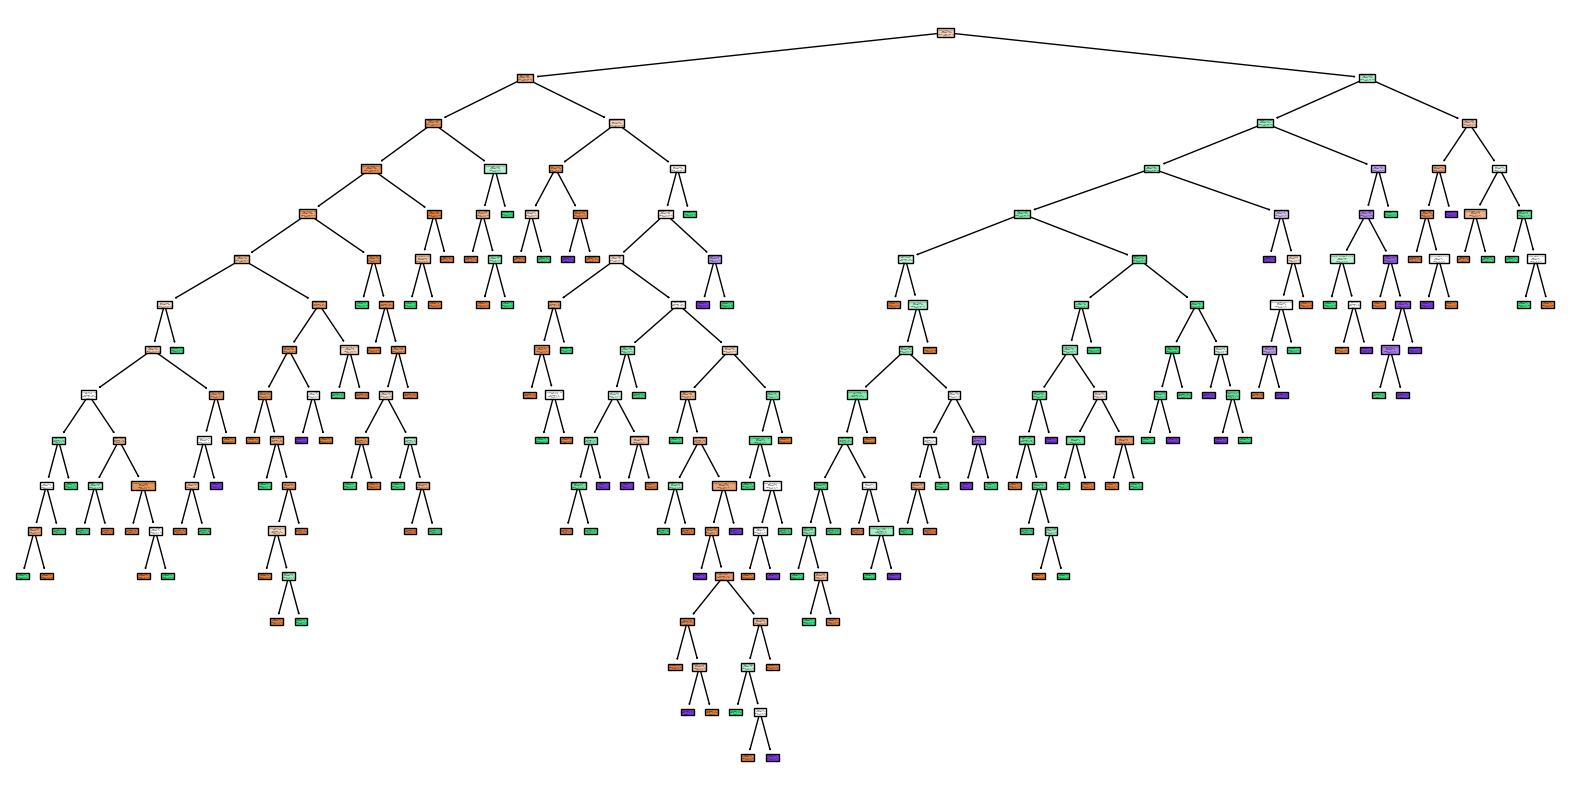

In [36]:
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns.tolist(), class_names=[str(i) for i in df['num'].unique()], filled=True)
plt.show()

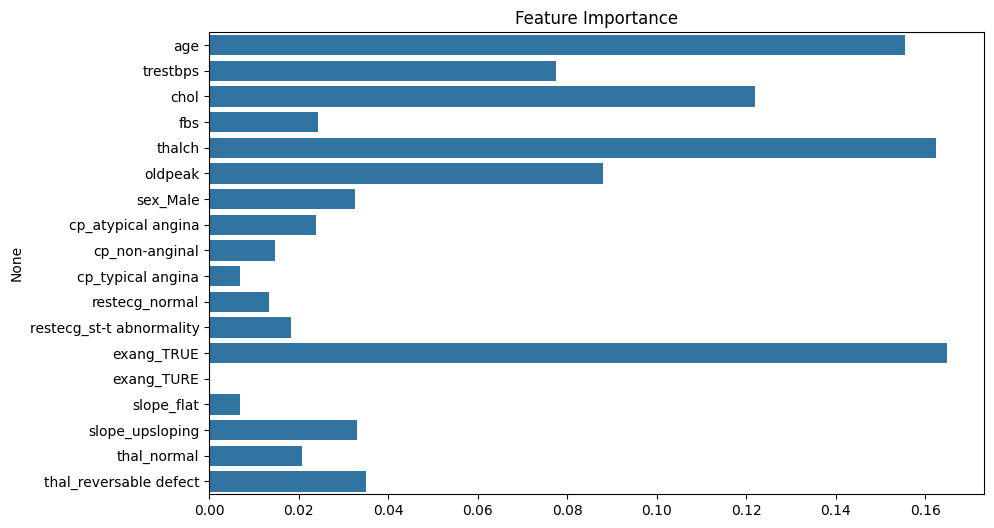

In [33]:
# Get feature importance
importances = clf.feature_importances_
feature_names = X.columns

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance')
plt.show()


## Interview Questions
### 1. Common Hyperparameters of Decision Tree Models and Their Effects:

- **max_depth**: 
  - **Definition**: This hyperparameter controls the maximum depth of the tree.
  - **Effect**: 
    - **Shallow Trees** (small values): May underfit the data as they cannot capture complex patterns.
    - **Deep Trees** (large values): Can lead to overfitting, where the model learns noise and specific details of the training data instead of generalizing well to unseen data.

- **min_samples_split**:
  - **Definition**: This parameter specifies the minimum number of samples required to split an internal node.
  - **Effect**: 
    - **High Values**: Prevents the tree from splitting too much, which can help reduce overfitting.
    - **Low Values**: Allows more splits, which can lead to a complex tree that might fit the training data very well but performs poorly on new data.

- **min_samples_leaf**:
  - **Definition**: This parameter determines the minimum number of samples that must be present in a leaf node.
  - **Effect**: 
    - **Higher Values**: Ensures that leaf nodes contain more samples, which can lead to a smoother decision boundary and help prevent overfitting.
    - **Lower Values**: Allows more fine-grained splits, which can capture more details but may also lead to overfitting.

- **criterion**:
  - **Definition**: This parameter determines the function used to measure the quality of a split. Common options are "gini" for Gini impurity and "entropy" for information gain.
  - **Effect**: 
    - Different criteria may lead to different tree structures. For example, using "entropy" can yield a more balanced split than "gini," depending on the data distribution.

- **max_features**:
  - **Definition**: This parameter specifies the maximum number of features to consider when looking for the best split.
  - **Effect**: 
    - **Smaller Values**: Can help in creating diverse trees in ensemble methods (like Random Forest) but may reduce the model's ability to find the optimal split if too few features are considered.
    - **Larger Values**: More likely to overfit, as more features are included in the split evaluation.

### 2. Difference Between Label Encoding and One-Hot Encoding:

- **Label Encoding**:
  - **Definition**: This technique converts categorical variables into numerical labels. Each unique category is assigned an integer value (e.g., `{'A': 0, 'B': 1, 'C': 2}`).
  - **When to Use**: Suitable for ordinal categorical data where the categories have a meaningful order (e.g., "low," "medium," "high").
  - **Disadvantages**: 
    - It introduces an ordinal relationship that may not exist (e.g., the model may interpret 'B' as being greater than 'A' and less than 'C'), potentially leading to misleading results in algorithms that assume a numerical order.

- **One-Hot Encoding**:
  - **Definition**: This technique converts each category into a new binary column (0 or 1). For example, a categorical variable with three categories (A, B, C) would be converted into three columns: 
    - A: [1, 0, 0]
    - B: [0, 1, 0]
    - C: [0, 0, 1]
  - **When to Use**: Best suited for nominal categorical data where there is no inherent order among categories.
  - **Advantages**: 
    - Prevents the model from assuming any ordinal relationships among categories and allows for better performance with many machine learning algorithms.
  - **Disadvantages**: 
    - Can significantly increase the dimensionality of the dataset, especially when there are many categories, which may lead to issues such as increased computation time and potential overfitting.